In [ ]:
# Importing required libraries
import pandas as pd
import requests
import json

# Extracting Data from Songstat

In [ ]:
# Extracting Sabrina's Info
import requests

# Make the GET request to the API
url = 'https://api.songstats.com/enterprise/v1/artists/info?songstats_artist_id=un412by6'
headers = {
    'Accept': 'application/json',
    'Accept-Encoding': '',
    'apikey': '22666d24-a34b-42b1-8894-802ccb0e7b7d',
    'User-Agent': 'my-app-name/1.0'
}

response = requests.get(url, headers=headers)

# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON response
    data = response.json()

    # Check if the result is successful
    if data.get('result') == 'success':
        artist_info = data.get('artist_info', {})

        # Extract data from the artist_info
        artist_data = {
            'Artist Name': artist_info.get('name'),
            'Songstats Artist ID': artist_info.get('songstats_artist_id'),
            'Country': artist_info.get('country'),
            'Biography': artist_info.get('bio'),
            'Avatar URL': artist_info.get('avatar'),
            'Site URL': artist_info.get('site_url')
        }

        # Print the structured data
        for key, value in artist_data.items():
            print(f"{key}: {value}")
    else:
        print("Error: Could not retrieve artist data")
else:
    print(f"Error: Unable to fetch data (status code {response.status_code})")

Artist Name: Sabrina Carpenter
Songstats Artist ID: un412by6
Country: US
Biography: Sabrina Carpenter has enchanted an audience of millions as a singer, songwriter, actress and style icon. With her music, she has delivered one anthem after another on stage and in the studio, earning multiple gold and platinum certifications, and performing to sold out crowds around the world.  On-screen, she has generated mega-fandom through starring roles on television and film. She is signed to Island Records, where she debuted her acclaimed Gold-certified fifth studio album, emails i can’t send, which appeared on many “Best Of 2022” lists including Rolling Stone and Billboard. In April 2024, Sabrina debuted at Coachella and released her single “Espresso,” which swiftly climbed to #1 on the UK and Australian charts, reached the Top 5 in the US, and hit #1 globally on Spotify, amassing over 200M streams in its first month. Following this, her second single, “Please Please Please,” released in June, so

In [ ]:
# Extracting Sabrina's Activities
!curl --request GET \
  --url 'https://api.songstats.com/enterprise/v1/artists/activities?songstats_artist_id=un412by6' \
  --header 'Accept: application/json' \
  --header 'Accept-Encoding: ' \
  --header 'apikey: 22666d24-a34b-42b1-8894-802ccb0e7b7d'

{"result":"success","message":"Data Retrieved.","data":[{"source":"soundcloud","activity_text":"Reposted by NAMNAM (18.7K Followers)","activity_type":"repost","activity_date":"2025-04-20","activity_url":"https://soundcloud.com/namnammusicc","activity_avatar":"https://i1.sndcdn.com/avatars-km8R6o5Ya0m8Odj1-0vx1xQ-t300x300.jpg","activity_tier":2,"track_info":{"songstats_track_id":"4yhnd396","avatar":"https://i1.sndcdn.com/artworks-xccY9OylIMjfzHOo-wu6Cdw-t300x300.jpg","title":"Espresso (Lucas Reyes Sentenza Remix)","release_date":"2024-10-18","site_url":"https://songstats.com/track/4yhnd396/espresso-lucas-reyes-sentenza-remix","artists":[{"name":"Sabrina Carpenter","songstats_artist_id":"un412by6"},{"name":"Lucas Reyes","songstats_artist_id":"gez6onb7"}]}},{"source":"soundcloud","activity_text":"Reposted by GrooveCube (2372 Followers)","activity_type":"repost","activity_date":"2025-04-20","activity_url":"https://soundcloud.com/groovecubemusic","activity_avatar":"https://i1.sndcdn.com/ava

In [ ]:
# Extracting Sabrina's Activities

# Make the GET request to the API
url = 'https://api.songstats.com/enterprise/v1/artists/activities?songstats_artist_id=un412by6'
headers = {
    'Accept': 'application/json',
    'Accept-Encoding': '',
    'apikey': '22666d24-a34b-42b1-8894-802ccb0e7b7d'
}

response = requests.get(url, headers=headers)

# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON response
    data = response.json()

    # Check if the result is successful
    if data.get('result') == 'success':
        # Extract activities data
        activities = data.get('data', [])

        # Prepare an empty list to store structured data for the DataFrame
        structured_data = []

        # Loop through each activity and collect relevant details
        for activity in activities:
            # Extract activity details
            source = activity.get('source')
            activity_text = activity.get('activity_text')
            activity_type = activity.get('activity_type')
            activity_date = activity.get('activity_date')
            activity_url = activity.get('activity_url')
            track_info = activity.get('track_info', {})

            # Extract track details
            track_title = track_info.get('title')
            track_release_date = track_info.get('release_date')
            track_site_url = track_info.get('site_url')
            track_avatar = track_info.get('avatar')
            track_artists = [artist.get('name') for artist in track_info.get('artists', [])]

            # Add the structured data for this activity to the list
            structured_data.append({
                'Source': source,
                'Activity Text': activity_text,
                'Activity Type': activity_type,
                'Activity Date': activity_date,
                'Activity URL': activity_url if activity_url else 'N/A',
                'Track Title': track_title,
                'Track Release Date': track_release_date,
                'Track Site URL': track_site_url,
                'Track Avatar': track_avatar,
                'Track Artists': ', '.join(track_artists)
            })

        # Create a DataFrame from the structured data
        df_activity = pd.DataFrame(structured_data)

        # Print the DataFrame
        print(df_activity.head())
    else:
        print("Error: Could not retrieve activity data")
else:
    print(f"Error: Unable to fetch data (status code {response.status_code})")


        Source                               Activity Text Activity Type  \
0   soundcloud        Reposted by NAMNAM (18.7K Followers)        repost   
1   soundcloud     Reposted by GrooveCube (2372 Followers)        repost   
2   soundcloud  Reposted by Kristian Mondz (500 Followers)        repost   
3   soundcloud  Reposted by Kristian Mondz (500 Followers)        repost   
4  apple_music                 Charted #144 on Pop: Angola   track_chart   

  Activity Date                            Activity URL  \
0    2025-04-20     https://soundcloud.com/namnammusicc   
1    2025-04-20  https://soundcloud.com/groovecubemusic   
2    2025-04-20   https://soundcloud.com/kristian-mondz   
3    2025-04-20   https://soundcloud.com/kristian-mondz   
4    2025-04-20                                     N/A   

                             Track Title Track Release Date  \
0  Espresso (Lucas Reyes Sentenza Remix)         2024-10-18   
1    Please Please Please (Whales Remix)         2024-10-09   

In [ ]:
df_activity.to_excel('Sabrina_Activities.xlsx')

NameError: name 'df_activity' is not defined

In [ ]:
# Extracting Sabrina's Current Stats

# Make the GET request to the API
url = 'https://api.songstats.com/enterprise/v1/artists/stats?songstats_artist_id=un412by6'
headers = {
    'Accept': 'application/json',
    'Accept-Encoding': '',
    'apikey': '22666d24-a34b-42b1-8894-802ccb0e7b7d'
}

response = requests.get(url, headers=headers)

# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON response
    data = response.json()

    # Check if the result is successful
    if data.get('result') == 'success':
        # Extract the stats data
        stats_data = data.get('stats', [])

        # Prepare a list to store structured data for the DataFrame
        structured_data = []

        # Loop through each source and extract relevant data
        for source_data in stats_data:
            source = source_data.get('source')
            data = source_data.get('data', {})

            # Extract values from the "data" dictionary for each source
            record = {
                'Source': source,
                'Streams Total': data.get('streams_total', 'N/A'),
                'Monthly Listeners Current': data.get('monthly_listeners_current', 'N/A'),
                'Popularity Current': data.get('popularity_current', 'N/A'),
                'Followers Total': data.get('followers_total', 'N/A'),
                'Playlists Current': data.get('playlists_current', 'N/A'),
                'Playlists Total': data.get('playlists_total', 'N/A'),
                'Playlists Editorial Current': data.get('playlists_editorial_current', 'N/A'),
                'Playlists Editorial Total': data.get('playlists_editorial_total', 'N/A'),
                'Playlist Reach Current': data.get('playlist_reach_current', 'N/A'),
                'Playlist Reach Total': data.get('playlist_reach_total', 'N/A'),
                'Charts Current': data.get('charts_current', 'N/A'),
                'Charts Total': data.get('charts_total', 'N/A'),
                'Charted Tracks Current': data.get('charted_tracks_current', 'N/A'),
                'Charted Tracks Total': data.get('charted_tracks_total', 'N/A'),
                'Charted Countries Total': data.get('charted_countries_total', 'N/A'),
                'Engagement Rate Total': data.get('engagement_rate_total', 'N/A'),
                'Video Views Total': data.get('video_views_total', 'N/A'),
                'Video Likes Total': data.get('video_likes_total', 'N/A'),
                'Video Comments Total': data.get('video_comments_total', 'N/A'),
                'Videos Total': data.get('videos_total', 'N/A'),
                'Shazams Total': data.get('shazams_total', 'N/A')
            }

            # Append the record for this source to the structured_data list
            structured_data.append(record)

        # Create a DataFrame from the structured data
        df_current_stats = pd.DataFrame(structured_data)

        # Print the DataFrame
        print(df_current_stats.head())
    else:
        print("Error: Could not retrieve stats data")
else:
    print(f"Error: Unable to fetch data (status code {response.status_code})")


        Source Streams Total Monthly Listeners Current Popularity Current  \
0      spotify   15890573581                  66506518                 92   
1  apple_music           N/A                       N/A                N/A   
2       amazon           N/A                       N/A                N/A   
3       deezer           N/A                       N/A                 94   
4    instagram           N/A                       N/A                N/A   

  Followers Total Playlists Current Playlists Total  \
0        21576813             28124           37874   
1             N/A               632             949   
2          755258               910            1371   
3         1328688               706            1050   
4        46516456               N/A             N/A   

  Playlists Editorial Current Playlists Editorial Total  \
0                         456                       900   
1                         323                       503   
2                         809

In [ ]:
df_current_stats.to_excel('Sabrina_Current_Stats.xlsx')

In [ ]:
# Getting  Sabrina's Historic Stats

# Define the API endpoint and headers
url = 'https://api.songstats.com/enterprise/v1/artists/historic_stats?songstats_artist_id=un412by6'
headers = {
    'Accept': 'application/json',
    'Accept-Encoding': '',
    'apikey': '22666d24-a34b-42b1-8894-802ccb0e7b7d'
}

# Send GET request
response = requests.get(url, headers=headers)

# Check if the response is successful
if response.status_code == 200:
    data = response.json()

    # List to hold all data entries for the DataFrame
    records = []

    # Iterate over each platform's stats
    for source in data['stats']:
        source_name = source['source']

        # Check if 'data' is a dictionary or a list
        if isinstance(source['data'], dict):
            # Handle case where 'data' is a dictionary
            history = source['data'].get('history', [])
        elif isinstance(source['data'], list):
            # Handle case where 'data' is a list
            history = source['data']
        else:
            history = []

        # Extract and structure the data for each entry
        for entry in history:
            record = {'source': source_name, 'date': entry['date']}

            # Extract relevant fields for each source
            if 'popularity_current' in entry:
                record['popularity_current'] = entry['popularity_current']
            if 'followers_total' in entry:
                record['followers_total'] = entry['followers_total']
            if 'monthly_listeners_current' in entry:
                record['monthly_listeners_current'] = entry['monthly_listeners_current']
            if 'streams_total' in entry:
                record['streams_total'] = entry['streams_total']
            if 'playlists_current' in entry:
                record['playlists_current'] = entry['playlists_current']
            if 'playlist_reach_current' in entry:
                record['playlist_reach_current'] = entry['playlist_reach_current']
            if 'charts_current' in entry:
                record['charts_current'] = entry['charts_current']
            if 'videos_total' in entry:
                record['videos_total'] = entry['videos_total']
            if 'views_total' in entry:
                record['views_total'] = entry['views_total']
            if 'likes_total' in entry:
                record['likes_total'] = entry['likes_total']
            if 'comments_total' in entry:
                record['comments_total'] = entry['comments_total']
            if 'followers_total' in entry:
                record['followers_total'] = entry['followers_total']
            if 'profile_likes_total' in entry:
                record['profile_likes_total'] = entry['profile_likes_total']
            if 'dj_charts_total' in entry:
                record['dj_charts_total'] = entry['dj_charts_total']
            if 'charted_tracks_current' in entry:
                record['charted_tracks_current'] = entry['charted_tracks_current']
            if 'shazams_total' in entry:
                record['shazams_total'] = entry['shazams_total']
            if 'talking_about_total' in entry:
                record['talking_about_total'] = entry['talking_about_total']
            if 'subscribers_total' in entry:
                record['subscribers_total'] = entry['subscribers_total']
            if 'video_views_total' in entry:
                record['video_views_total'] = entry['video_views_total']

            # Append the structured record to the list
            records.append(record)

    # Create the DataFrame
    df_historic_stats = pd.DataFrame(records)

    # Display the DataFrame
    print(df_historic_stats.head())
else:
    print(f"Failed to retrieve data: {response.status_code}")



    source        date  popularity_current  followers_total  \
0  spotify  2020-04-19                76.0        2684748.0   
1  spotify  2020-04-20                76.0        2686554.0   
2  spotify  2020-04-21                76.0        2688451.0   
3  spotify  2020-04-22                76.0        2690506.0   
4  spotify  2020-04-23                76.0        2692414.0   

   monthly_listeners_current  streams_total  videos_total  views_total  \
0                  8948019.0            NaN           NaN          NaN   
1                  8948019.0            NaN           NaN          NaN   
2                  8943499.0            NaN           NaN          NaN   
3                  8938407.0            NaN           NaN          NaN   
4                  8928001.0            NaN           NaN          NaN   

   likes_total  comments_total  profile_likes_total  video_views_total  \
0          NaN             NaN                  NaN                NaN   
1          NaN             N

In [ ]:
df_historic_stats.to_excel('Sabrina_Carpenter_Trends.xlsx', index=False)

In [ ]:
# Extracting Sabrina's Catalog

# API request setup
url = 'https://api.songstats.com/enterprise/v1/artists/catalog?songstats_artist_id=un412by6'
headers = {
    'Accept': 'application/json',
    'Accept-Encoding': '',
    'apikey': '22666d24-a34b-42b1-8894-802ccb0e7b7d'
}

# Make the GET request
response = requests.get(url, headers=headers)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()  # Parse the JSON response

    # Extract the 'catalog' data from the response
    catalog = data.get('catalog', [])

    # Convert catalog data into a DataFrame
    tracks_data = []

    for track in catalog:
        for artist in track['artists']:
            track_info = {
                'songstats_track_id': track['songstats_track_id'],
                'title': track['title'],
                'release_date': track['release_date'],
                'site_url': track['site_url'],
                'avatar': track['avatar'],
                'isrcs': ', '.join(track['isrcs']),  # Combine ISRCs into a comma-separated string
                'artist_name': artist['name'],
                'artist_songstats_id': artist['songstats_artist_id']
            }
            tracks_data.append(track_info)

    # Create the DataFrame
    df_catalog = pd.DataFrame(tracks_data)
    print(df_catalog.head())
else:
    print(f"Error: Unable to fetch data. Status code: {response.status_code}")

In [ ]:
df_catalog.to_excel('Sabrina_Catalog.xlsx')

In [ ]:
# Sabrina's songshare

# Define the API endpoint and headers
url = 'https://api.songstats.com/enterprise/v1/artists/songshare?songstats_artist_id=un412by6'
headers = {
    'Accept': 'application/json',
    'Accept-Encoding': '',
    'apikey': '22666d24-a34b-42b1-8894-802ccb0e7b7d'
}

# Make the GET request to fetch the data
response = requests.get(url, headers=headers)

# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON response
    data = response.json()

    # Extract the data section of the response
    songshare_data = data.get('data', {})

    # Flatten the nested data and prepare a dictionary for DataFrame
    df_songshare_data = {
        'songstats_artist_id': songshare_data.get('songstats_artist_id'),
        'name': songshare_data.get('name'),
        'total_track_visits': songshare_data.get('total_track_visits'),
        'total_track_clicks': songshare_data.get('total_track_clicks'),
        'total_track_click_through_rate': songshare_data.get('total_track_click_through_rate'),
        'artist_visits': songshare_data.get('artist_visits'),
    }

    # Handle the nested dictionary for 'total_track_clicks_by_source'
    total_clicks_by_source = songshare_data.get('total_track_clicks_by_source', {})

    # Flatten the 'total_track_clicks_by_source' into separate columns
    for key, value in total_clicks_by_source.items():
        df_songshare_data[f'total_clicks_{key}'] = value

    # Convert the dictionary to a DataFrame
    df_songshare = pd.DataFrame([df_songshare_data])

    # Display the DataFrame
    print(df_songshare)
else:
    print(f"Error: Unable to fetch data. Status code: {response.status_code}")

In [ ]:
# Column Definitions

# Make the GET request
url = "https://api.songstats.com/enterprise/v1/definitions"
headers = {
    'Accept': 'application/json',
    'Accept-Encoding': '',
    'apikey': '22666d24-a34b-42b1-8894-802ccb0e7b7d'
}

response = requests.get(url, headers=headers)

# Check the response content
data = response.json()

# Print the entire response to inspect its structure
print(data)

# If 'result' is 'success' and 'definitions' is present
if data.get('result') == 'success' and 'definitions' in data:
    definitions = data['definitions']['data_type_definitions']

    # Convert the definitions into a DataFrame
    df_definitions = pd.DataFrame(list(definitions.items()), columns=['Data Type', 'Description'])

    # Display the DataFrame
    print(df_definitions.head())
else:
    print("Error in response:", data)

In [ ]:
df_definitions.to_excel('Data_Definition.xlsx')

# Analysis

In [ ]:
pip install pandas matplotlib seaborn openpyxl


In [ ]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
import numpy as np
from scipy import stats

# 1. Loading and Cleaning the Datasets

In [ ]:
# Load trendlines data
df_trend_raw = pd.read_excel('/content/Trendlines_Data.xlsx')
df_trend_raw.columns = df_trend_raw.iloc[1]
df_trend = df_trend_raw.drop([0, 1]).copy()
df_trend = df_trend.rename(columns={df_trend.columns[1]: "Date"})
df_trend["Date"] = pd.to_datetime(df_trend["Date"], errors="coerce")
df_trend = df_trend.dropna(subset=["Date"])

# Select metrics of interest
columns_of_interest = [
    "Date",
    "Instagram Followers",
    "Spotify Monthly Listeners",
    "Spotify Followers",
    "Spotify Streams",
    "Tiktok Views",
    "Youtube Video Views",
    "Shazams"
]
df_trend = df_trend[columns_of_interest].copy()
df_trend.columns = ["Date", "Instagram", "SpotifyMonthly", "SpotifyFollowers",
                    "SpotifyStreams", "TiktokViews", "YouTubeViews", "Shazams"]

# Convert all metrics to numeric
for col in df_trend.columns[1:]:
    df_trend[col] = pd.to_numeric(df_trend[col], errors="coerce")



In [ ]:
df_trend.head()

,Date,Instagram,SpotifyMonthly,SpotifyFollowers,SpotifyStreams,TiktokViews,YouTubeViews,Shazams
2,2023-01-01,28204924.0,18950089,4828700,2990298008,798509084.0,1363919526,10706780.0
3,2023-01-02,28201510.0,19022173,4833051,2992386081,801276936.0,1364358983,10709261.0
4,2023-01-03,28205958.0,18998736,4837300,2995212181,804050127.0,1364536823,10732772.0
5,2023-01-04,28211312.0,18975145,4841301,2998829011,806827054.0,1366610066,10734991.0
6,2023-01-05,28216877.0,18987894,4845266,3001748146,809609404.0,1366689001,10738175.0


In [ ]:
# Load Sabrina's Journey data
df_journey = pd.read_excel("Sabrina's Journey.xlsx")

# Use the second row as header and drop the first two rows
df_journey.columns = df_journey.iloc[1]
df_journey = df_journey.drop([0, 1])
# Rename key columns
df_journey = df_journey.rename(columns={"Exact Event Dates": "Date", "Events": "Event"})
df_journey["Date"] = pd.to_datetime(df_journey["Date"], errors="coerce")
df_journey = df_journey[["Date", "Event"]].dropna()

In [ ]:
df_journey.head()

1,Date,Event
2,2023-02-17,"Released her fifth studio album, ""Emails I Can..."
3,2023-03-16,"Embarked on the ""Emails I Can't Send Tour,"" pe..."
4,2023-05-06,"Featured on the cover of Teen Vogue, discussin..."
5,2023-08-18,"Starred in the Netflix romantic comedy ""Love i..."
6,2023-10-10,Announced as a brand ambassador for Samsung's ...


# 2. Plot Time Series with Events

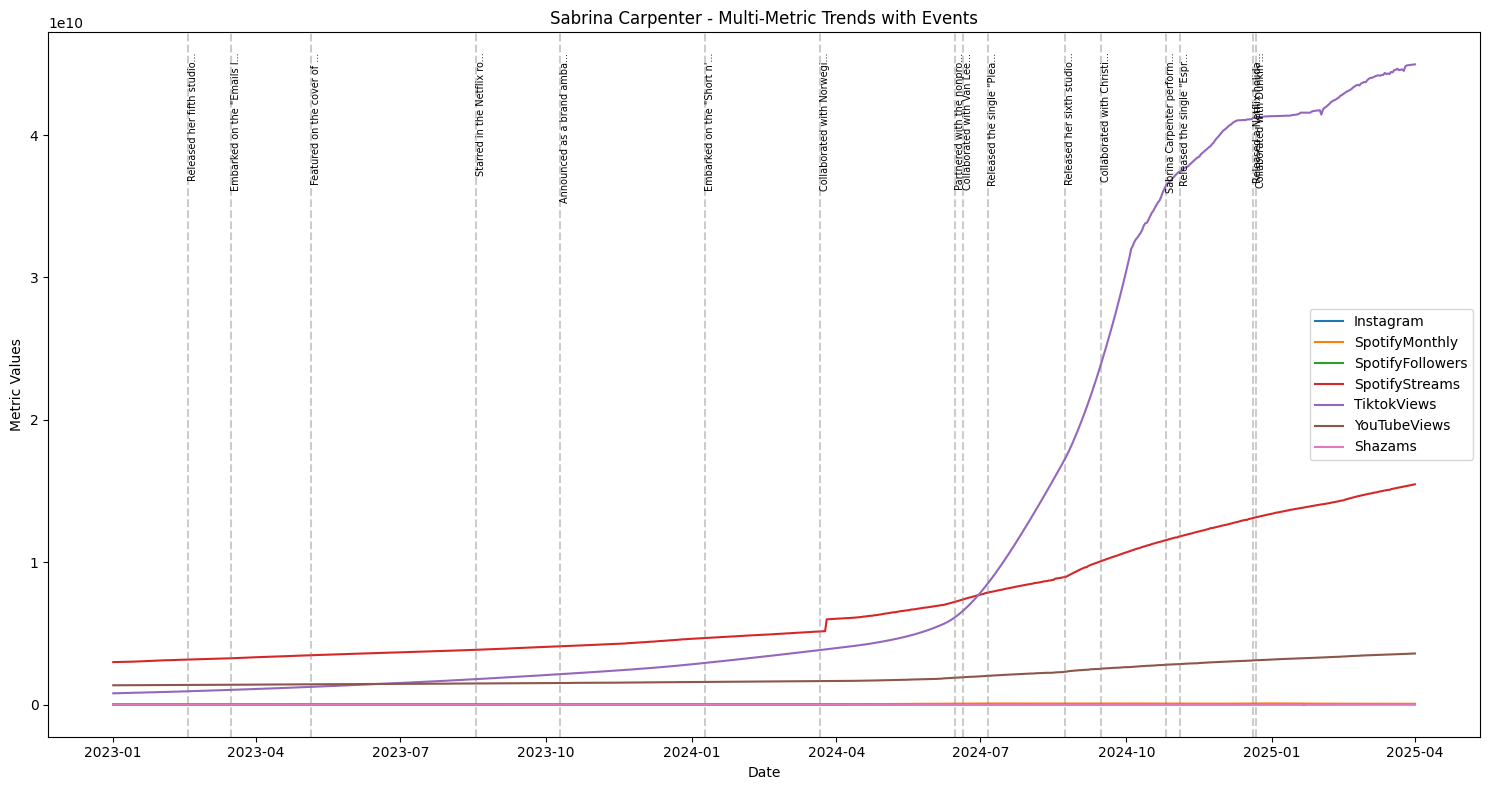

In [ ]:
plt.figure(figsize=(15, 8))

# Plot key metrics
metrics_to_plot = ["Instagram", "SpotifyMonthly", "SpotifyFollowers",
                   "SpotifyStreams", "TiktokViews", "YouTubeViews", "Shazams"]

for metric in metrics_to_plot:
    sns.lineplot(data=df_trend, x="Date", y=metric, label=metric)

# Annotate events
for _, row in df_journey.iterrows():
    plt.axvline(row["Date"], color='grey', linestyle='--', alpha=0.4)
    plt.text(row["Date"], plt.ylim()[1]*0.97, row["Event"][:25] + "...",
             rotation=90, fontsize=7, color='black', va='top')

plt.title("Sabrina Carpenter - Multi-Metric Trends with Events")
plt.ylabel("Metric Values")
plt.xlabel("Date")
plt.legend()
plt.tight_layout()
plt.show()

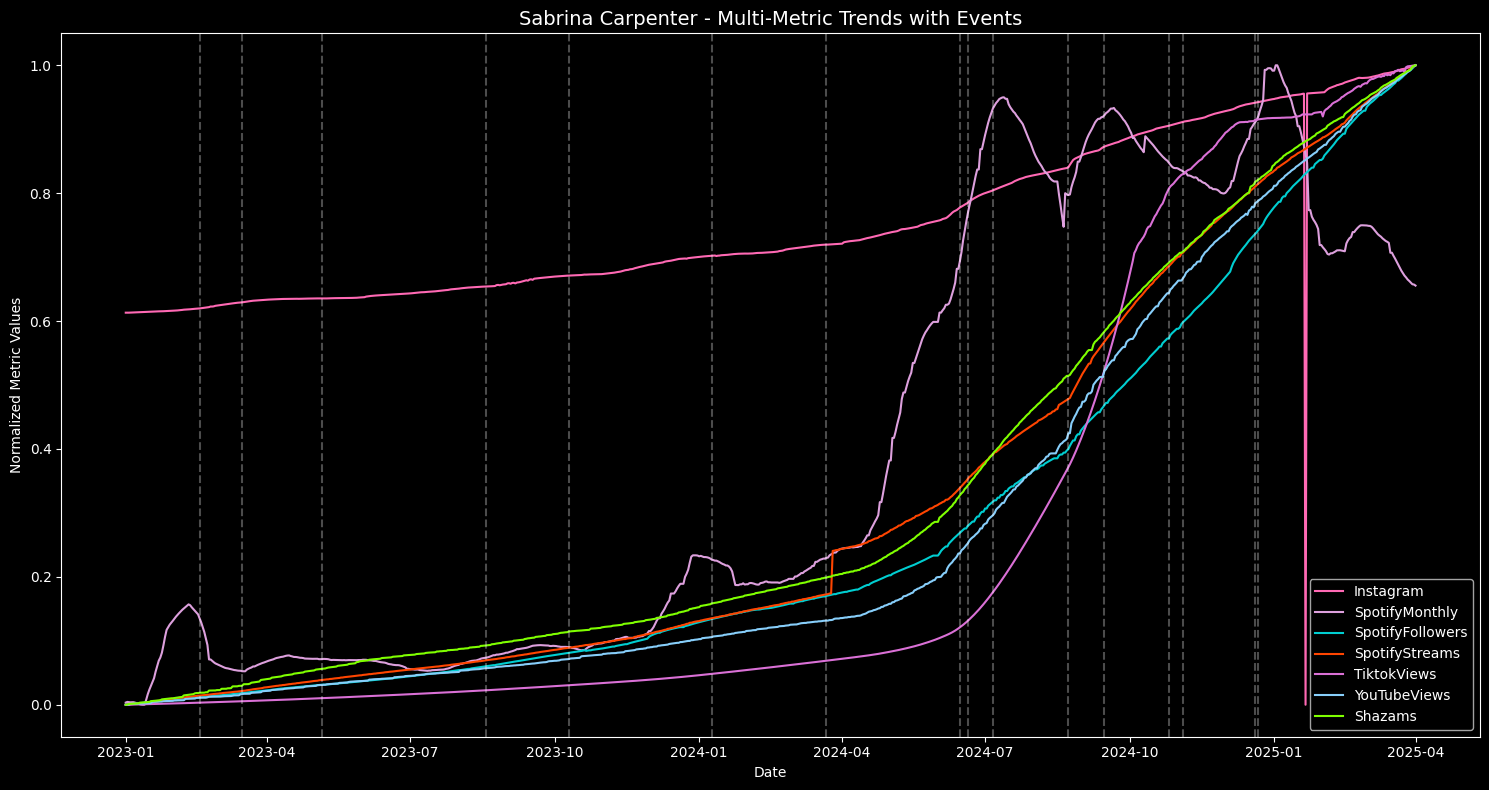

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Set dark background
plt.style.use('dark_background')

# Define poppy colors for each metric
colors = {
    "Instagram": "#ff69b4",         # hot pink
    "SpotifyMonthly": "#dda0dd",    # plum
    "SpotifyFollowers": "#00ced1",  # dark turquoise
    "SpotifyStreams": "#ff4500",    # orange red
    "TiktokViews": "#da70d6",       # orchid
    "YouTubeViews": "#87cefa",      # light sky blue
    "Shazams": "#7fff00"            # chartreuse
}

# Normalize data
metrics_to_plot = list(colors.keys())
df_normalized = df_trend.copy()
scaler = MinMaxScaler()
df_normalized[metrics_to_plot] = scaler.fit_transform(df_normalized[metrics_to_plot])

# Plot
plt.figure(figsize=(15, 8))
for metric in metrics_to_plot:
    sns.lineplot(data=df_normalized, x="Date", y=metric, label=metric, color=colors[metric])

# Add event lines (no labels)
for _, row in df_journey.iterrows():
    plt.axvline(row["Date"], color='white', linestyle='--', alpha=0.3)

# Final touches
plt.title("Sabrina Carpenter - Multi-Metric Trends with Events", fontsize=14)
plt.ylabel("Normalized Metric Values")
plt.xlabel("Date")
plt.legend()
plt.tight_layout()
plt.show()


# 3. Spike Analysis Pre/Post Events

In [ ]:
def classify_event(desc):
    desc = str(desc).lower()
    if "album" in desc:
        return "Album"
    elif "single" in desc or "released" in desc:
        return "Single"
    else:
        return "Other"
# Marking if the event was a brand collaboration

df_journey["is_brand_collab"] = False
collab_indices = [4, 6, 12, 19]  # Example indices from the event description
df_journey.loc[collab_indices, "is_brand_collab"] = True

# Analysis to identify change in metrics in a 28 day window
df_journey["Type"] = df_journey["Event"].apply(classify_event)
window = timedelta(days=28)
spike_results = []

for _, row in df_journey.iterrows():
    event_date = row["Date"]
    row_result = {"Event": row["Event"], "Type": row["Type"], "Brand_Collab":row["is_brand_collab"], "Date": event_date}

    # Define window
    pre = df_trend[(df_trend["Date"] >= event_date - window) & (df_trend["Date"] < event_date)]
    post = df_trend[(df_trend["Date"] >= event_date) & (df_trend["Date"] <= event_date + window)]

    for metric in metrics_to_plot:
        pre_avg = pre[metric].mean()
        post_avg = post[metric].mean()
        if pre_avg and pre_avg != 0:
            change_pct = ((post_avg - pre_avg) / pre_avg) * 100
        else:
            change_pct = np.nan
        row_result[f"{metric}_Change(%)"] = change_pct

    spike_results.append(row_result)

df_spikes = pd.DataFrame(spike_results)
print("==== Spike Analysis Table ====")
print(df_spikes)

==== Spike Analysis Table ====
                                                Event    Type  Brand_Collab  \
0   Released her fifth studio album, "Emails I Can...   Album         False   
1   Embarked on the "Emails I Can't Send Tour," pe...   Other         False   
2   Featured on the cover of Teen Vogue, discussin...   Other          True   
3   Starred in the Netflix romantic comedy "Love i...   Other         False   
4   Announced as a brand ambassador for Samsung's ...   Other          True   
5   Collaborated with Norwegian singer-songwriter ...  Single         False   
6   Released the single "Espresso," which topped t...  Single         False   
7   Released the single "Please Please Please," be...  Single         False   
8   Partnered with the nonprofit PLUS1 to create t...   Other         False   
9   Collaborated with Van Leeuwen Ice Cream on an ...   Other          True   
10  Released her sixth studio album, "Short n' Swe...   Album         False   
11  Embarked on the "

# 4. Compare Singles vs Albums (Statistical Test + Boxplot)

<ipython-input-10-ef51fb3ec884>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-10-ef51fb3ec884>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-10-ef51fb3ec884>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-10-ef51fb3ec884>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-10-ef51fb3ec884>:20: FutureWarning: 

Passing `pa

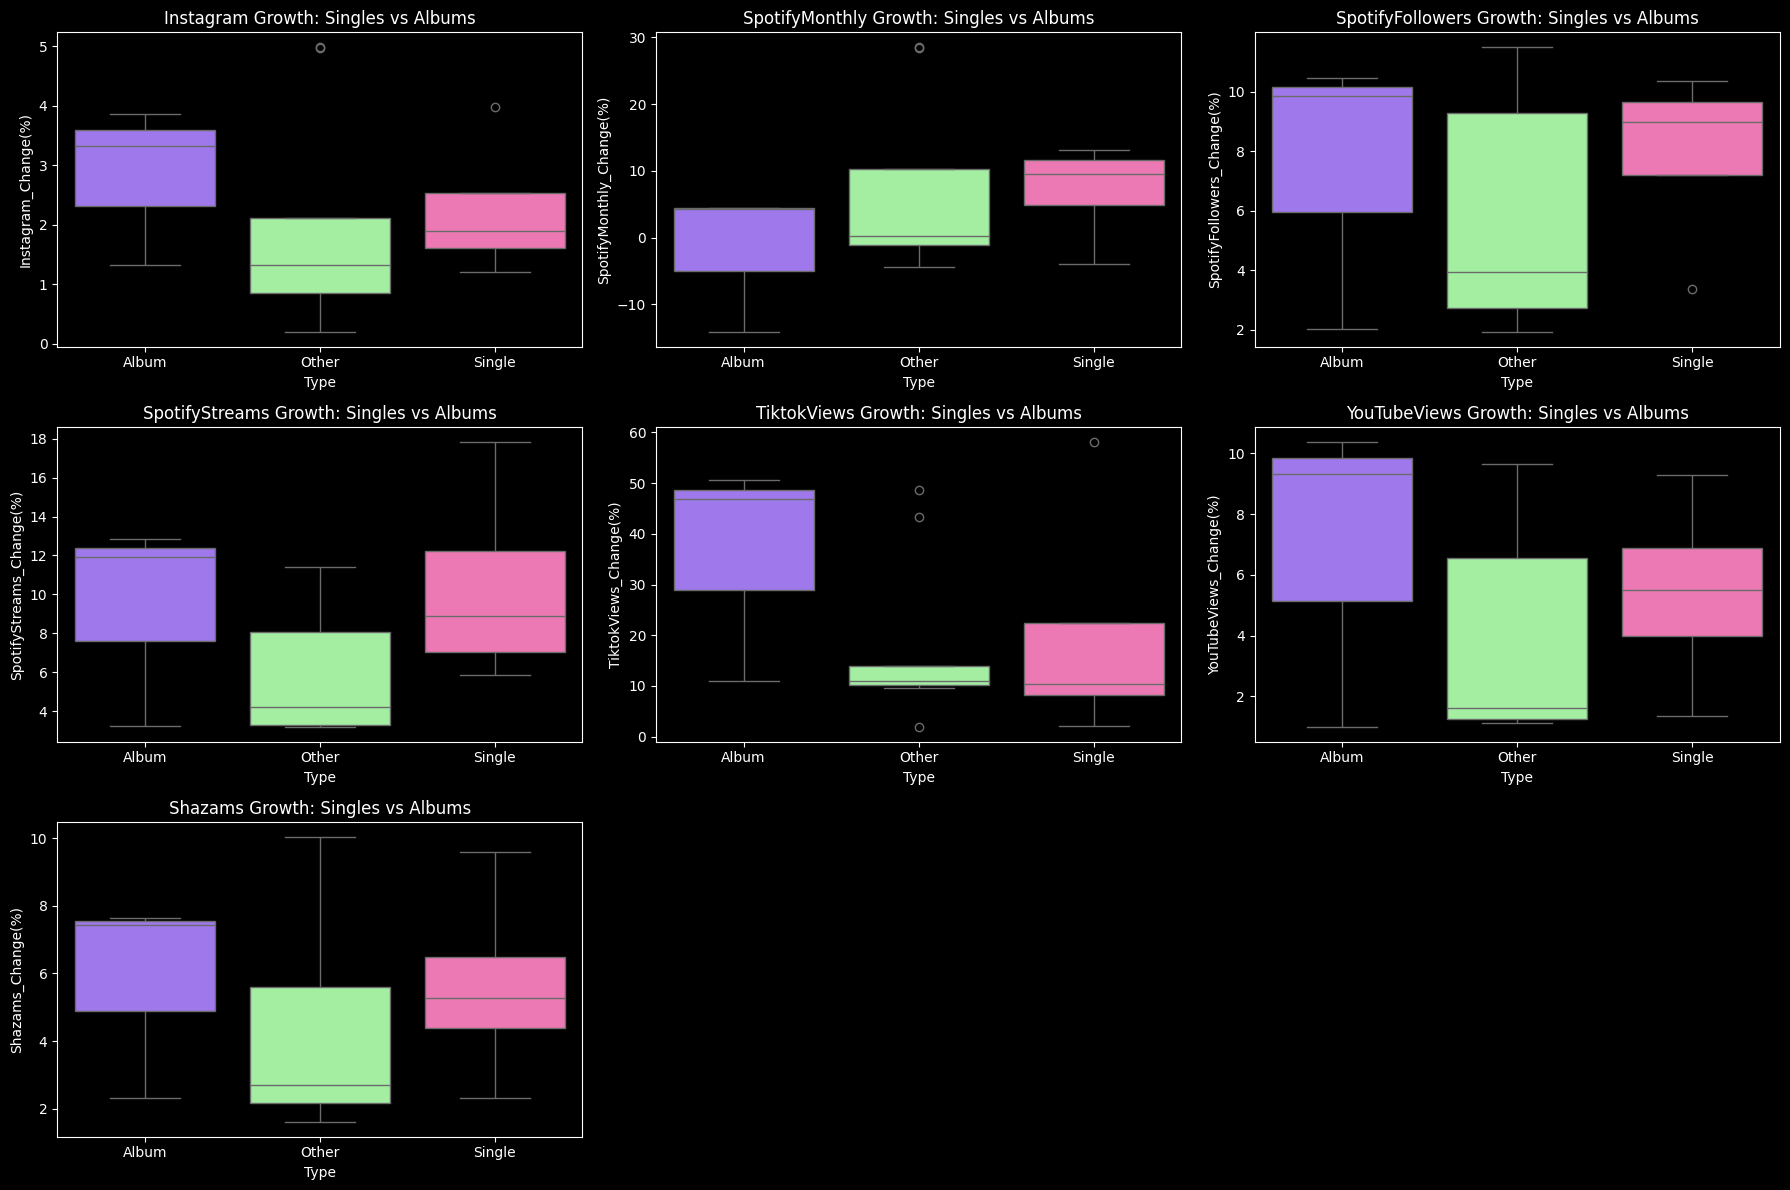

In [ ]:
# Define consistent color palette by release type
type_palette = {
    "Single": "#FF66B3",  # hot pink
    "Album": "#9966FF",   # light blue
    "Other": "#98fb95"    # pale green
}

# Number of plots per row
plots_per_row = 3

# Calculate number of rows needed
num_rows = (len(metrics_to_plot) + plots_per_row - 1) // plots_per_row

# Create figure and axes
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(18, 4 * num_rows))
axes = axes.flatten()

# Plot each boxplot with type-based colors
for i, metric in enumerate(metrics_to_plot):
    sns.boxplot(
        x="Type",
        y=f"{metric}_Change(%)",
        data=df_spikes,
        ax=axes[i],
        palette=type_palette
    )
    axes[i].set_title(f"{metric} Growth: Singles vs Albums")

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
df_spikes.head()

,Event,Type,Brand_Collab,Date,Instagram_Change(%),SpotifyMonthly_Change(%),SpotifyFollowers_Change(%),SpotifyStreams_Change(%),TiktokViews_Change(%),YouTubeViews_Change(%),Shazams_Change(%)
0,"Released her fifth studio album, ""Emails I Can...",Album,False,2023-02-17,1.316973,-14.182566,2.018189,3.230935,10.927895,0.980671,2.311190
1,"Embarked on the ""Emails I Can't Send Tour,"" pe...",Other,False,2023-03-16,1.315501,-2.777277,2.344523,3.478708,10.968437,1.273285,2.708030
2,"Featured on the cover of Teen Vogue, discussin...",Other,True,2023-05-06,0.188121,-1.056278,1.904448,3.232006,10.833138,1.164594,2.169815
3,"Starred in the Netflix romantic comedy ""Love i...",Other,False,2023-08-18,1.105617,5.576606,3.007129,3.161424,10.237246,1.125571,1.697026
4,Announced as a brand ambassador for Samsung's ...,Other,True,2023-10-10,0.760712,0.174622,2.717748,3.267291,9.656804,1.401153,1.595260


In [ ]:
df_spikes.to_excel('Sabrina_Spike_Analysis.xlsx')

# 5. Working on Brand Collabs Analytics


<ipython-input-12-1464fe27f436>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


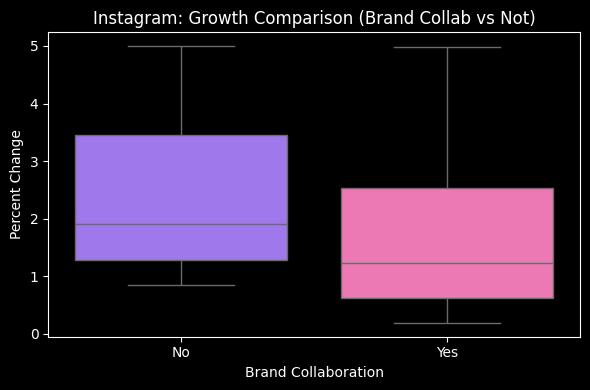

<ipython-input-12-1464fe27f436>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


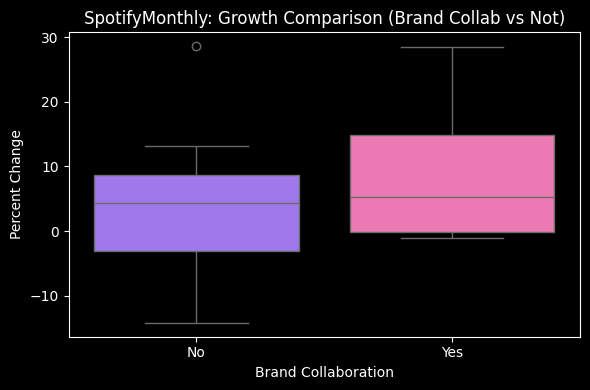

<ipython-input-12-1464fe27f436>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


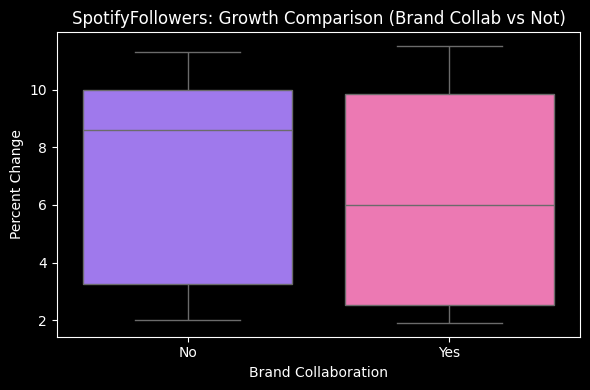

<ipython-input-12-1464fe27f436>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


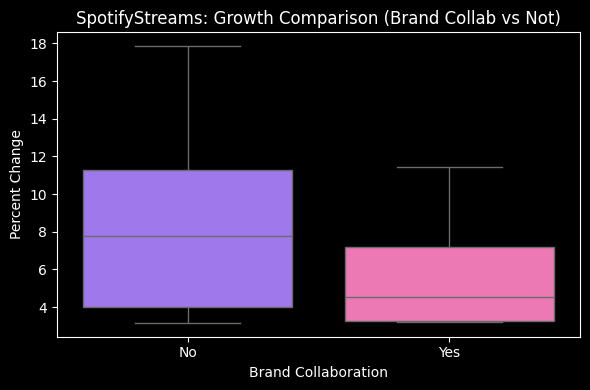

<ipython-input-12-1464fe27f436>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


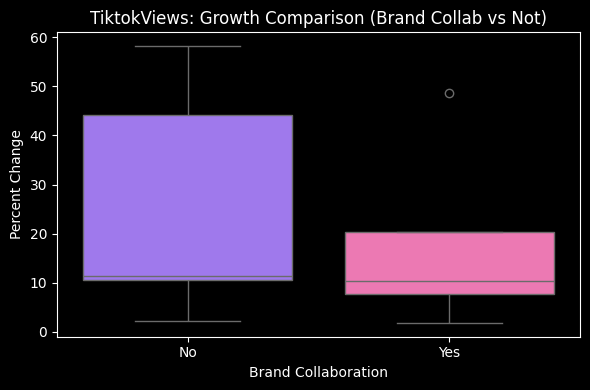

<ipython-input-12-1464fe27f436>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


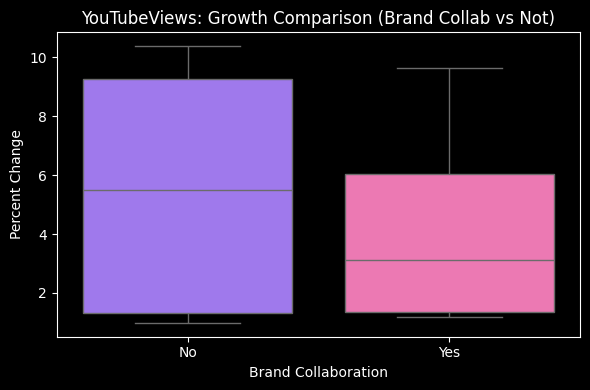

<ipython-input-12-1464fe27f436>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


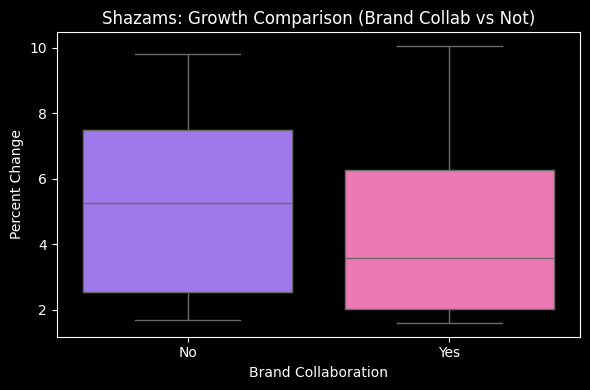

In [ ]:
# Ensure Brand_Collab is clean and string-based
df_spikes["Brand_Collab"] = df_spikes["Brand_Collab"].map({True: "Yes", False: "No"})

# Define your custom palette
brand_palette = {
    "Yes": "#ff66b3",  # pink
    "No": "#9966ff"    # purple
}

# Plot using Seaborn with palette
for metric in metrics_to_plot:
    plt.figure(figsize=(6, 4))
    sns.boxplot(
        data=df_spikes,
        x="Brand_Collab",
        y=f"{metric}_Change(%)",
        palette=brand_palette
    )
    plt.title(f"{metric}: Growth Comparison (Brand Collab vs Not)")
    plt.xlabel("Brand Collaboration")
    plt.ylabel("Percent Change")
    plt.tight_layout()
    plt.show()


In [ ]:
print(df_spikes["Brand_Collab"].unique())


[False  True]


# Regression Modelling for Brand Collabs


In [ ]:
# Filter only brand collaboration events

# Filter for brand collab events
brand_collabs = df_journey[df_journey["is_brand_collab"] == True].copy()

# Set up 28-day window before and after
window_days = 28
combined_data = []

# Loop through each brand collab
for i, row in brand_collabs.iterrows():
    event_date = row["Date"]
    event_id = f"brand_event_{i}"

    # Filter full rows from df_trend (includes all metrics)
    pre_post_data = df_trend[
        (df_trend["Date"] >= event_date - timedelta(days=window_days)) &
        (df_trend["Date"] <= event_date + timedelta(days=window_days)- timedelta(days=1))
        ].copy()

    # Add flags/IDs for analysis
    pre_post_data["period"] = (pre_post_data["Date"] >= event_date).astype(int)
    pre_post_data["event_id"] = event_id
    pre_post_data["event_date"] = event_date

    combined_data.append(pre_post_data)

# Combine all event windows into one full dataset
df_prepost = pd.concat(combined_data, ignore_index=True)

# Optional: Check columns and shape
print(df_prepost.columns)
print(df_prepost.shape)
df_prepost.head()

Index(['Date', 'Instagram', 'SpotifyMonthly', 'SpotifyFollowers',
       'SpotifyStreams', 'TiktokViews', 'YouTubeViews', 'Shazams', 'period',
       'event_id', 'event_date'],
      dtype='object')
(224, 11)


,Date,Instagram,SpotifyMonthly,SpotifyFollowers,SpotifyStreams,TiktokViews,YouTubeViews,Shazams,period,event_id,event_date
0,2023-04-08,29179543.0,23995623,5226603,3361391492,1.130812e+09,1416651292,11590932.0,0,brand_event_4,2023-05-06
1,2023-04-09,29185651.0,24043723,5230201,3367530569,1.134962e+09,1416750309,11597403.0,0,brand_event_4,2023-05-06
2,2023-04-10,29189168.0,24079358,5233870,3368774176,1.139135e+09,1417109005,11602823.0,0,brand_event_4,2023-05-06
3,2023-04-11,29191635.0,24102086,5237616,3375393255,1.143342e+09,1417888585,11620729.0,0,brand_event_4,2023-05-06
4,2023-04-12,29193627.0,24159312,5241170,3376608108,1.147555e+09,1419551812,11634469.0,0,brand_event_4,2023-05-06


In [ ]:
brand_collabs.head()

1,Date,Event,is_brand_collab,Type
4,2023-05-06,"Featured on the cover of Teen Vogue, discussin...",True,Other
6,2023-10-10,Announced as a brand ambassador for Samsung's ...,True,Other
12,2024-06-20,Collaborated with Van Leeuwen Ice Cream on an ...,True,Other
19,2024-12-22,"Collaborated with Dunkin' Donuts to release ""S...",True,Other


In [ ]:
# Performing Linear interpolation to fill Null Values (If any)

# For all continuous numeric columns in df_prepost
for col in ["Instagram", "SpotifyMonthly", "SpotifyFollowers",
            "SpotifyStreams", "TiktokViews", "YouTubeViews", "Shazams"]:
    df_prepost[col] = df_prepost[col].interpolate(method='linear')


In [ ]:
df_prepost.head()

,Date,Instagram,SpotifyMonthly,SpotifyFollowers,SpotifyStreams,TiktokViews,YouTubeViews,Shazams,period,event_id,event_date
0,2023-04-08,29179543.0,23995623,5226603,3361391492,1.130812e+09,1416651292,11590932.0,0,brand_event_4,2023-05-06
1,2023-04-09,29185651.0,24043723,5230201,3367530569,1.134962e+09,1416750309,11597403.0,0,brand_event_4,2023-05-06
2,2023-04-10,29189168.0,24079358,5233870,3368774176,1.139135e+09,1417109005,11602823.0,0,brand_event_4,2023-05-06
3,2023-04-11,29191635.0,24102086,5237616,3375393255,1.143342e+09,1417888585,11620729.0,0,brand_event_4,2023-05-06
4,2023-04-12,29193627.0,24159312,5241170,3376608108,1.147555e+09,1419551812,11634469.0,0,brand_event_4,2023-05-06


In [ ]:
# Running regression in Loop for all metrics

import statsmodels.formula.api as smf

# Choosing the target metric
metrics = ["SpotifyMonthly", "Instagram", "SpotifyFollowers", "SpotifyStreams", "TiktokViews", "YouTubeViews", "Shazams"]

for metric in metrics:
# Drop missing rows (if any left after interpolation)
    df_model = df_prepost.dropna(subset=[metric])

# Regression formula
    formula = f"{metric} ~ period + C(event_id)"

# Run OLS regression
    model = smf.ols(formula=formula, data=df_model).fit()

# Model Summary
    print(f"\nRegression for {metric}")
    print(model.summary())



Regression for SpotifyMonthly
                            OLS Regression Results                            
Dep. Variable:         SpotifyMonthly   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     2068.
Date:                Mon, 12 May 2025   Prob (F-statistic):          1.23e-172
Time:                        18:58:51   Log-Likelihood:                -3747.6
No. Observations:                 224   AIC:                             7505.
Df Residuals:                     219   BIC:                             7522.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

Regression analysis across 2 years of daily data points and 4 brand events reveals statistically significant increases across all key engagement metrics, with SpotifyMonthly (+6.6M), TikTokViews (+927M), and SpotifyStreams (+438M).

# Plots to visualise each metric individually 28 days pre-post event

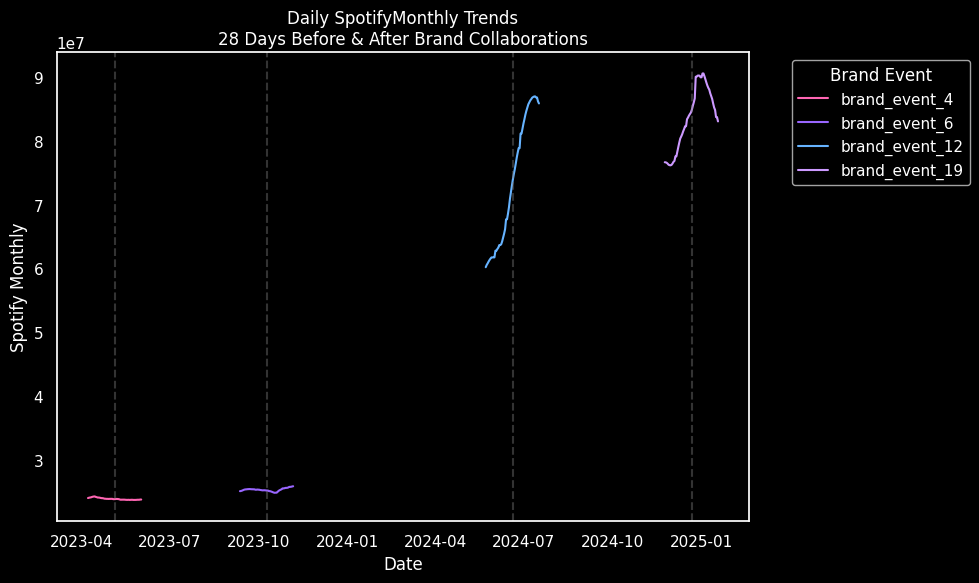

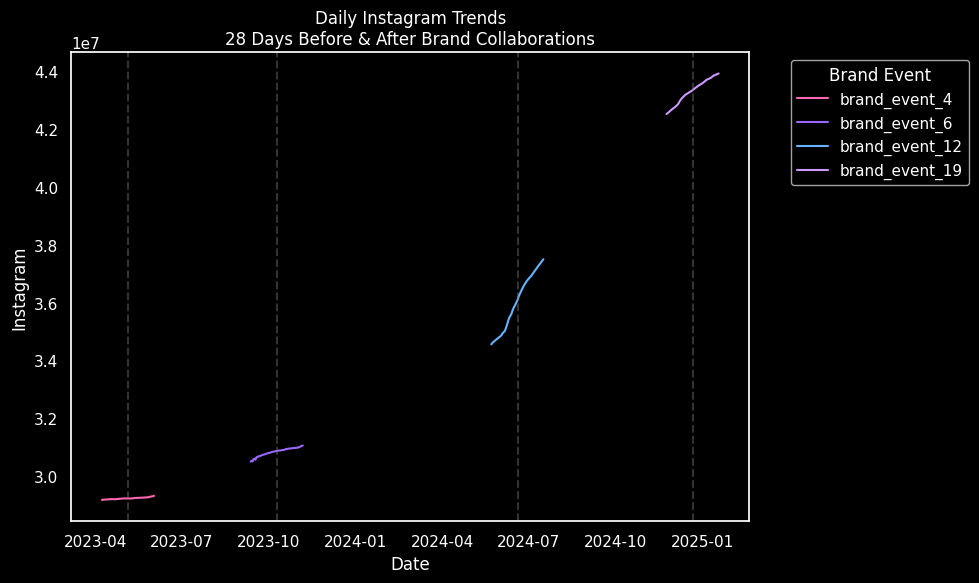

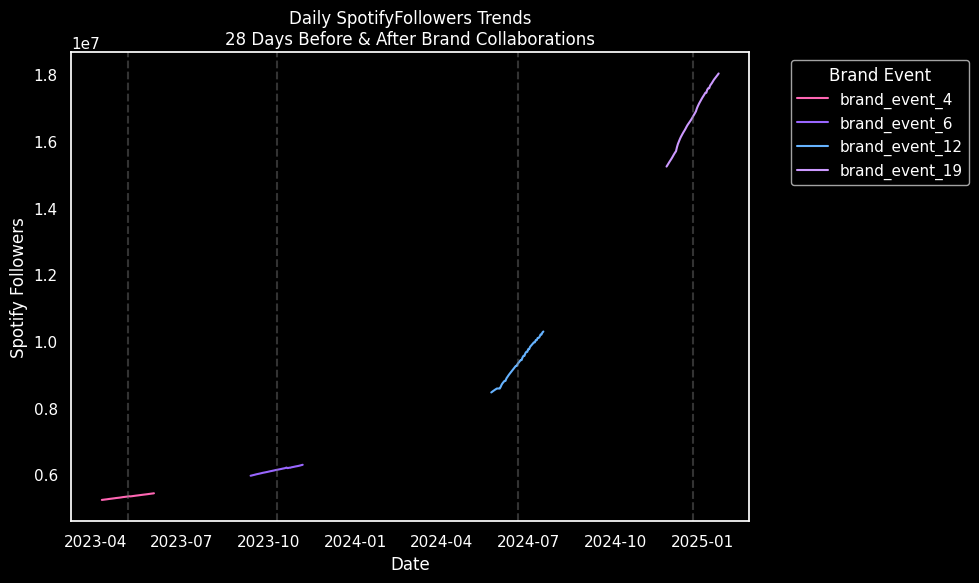

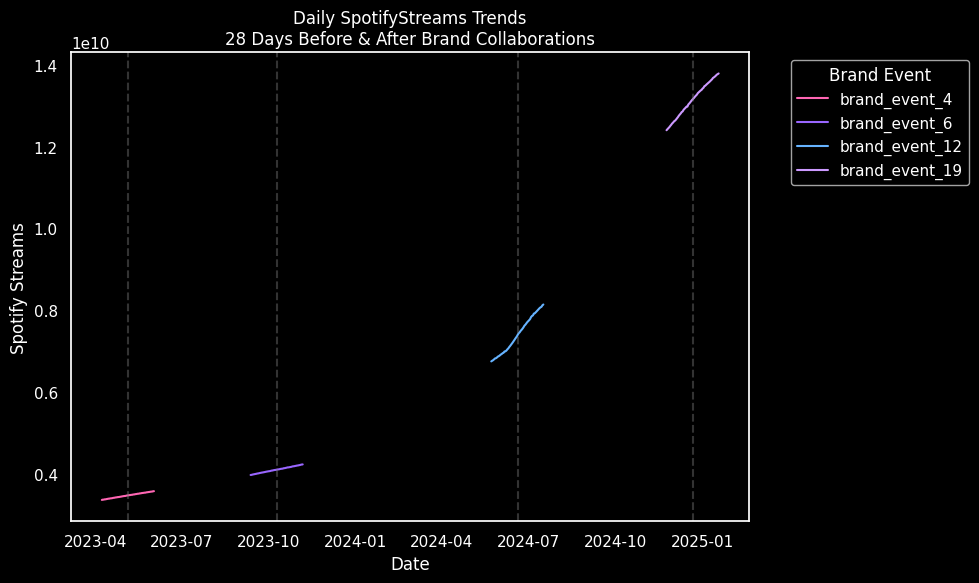

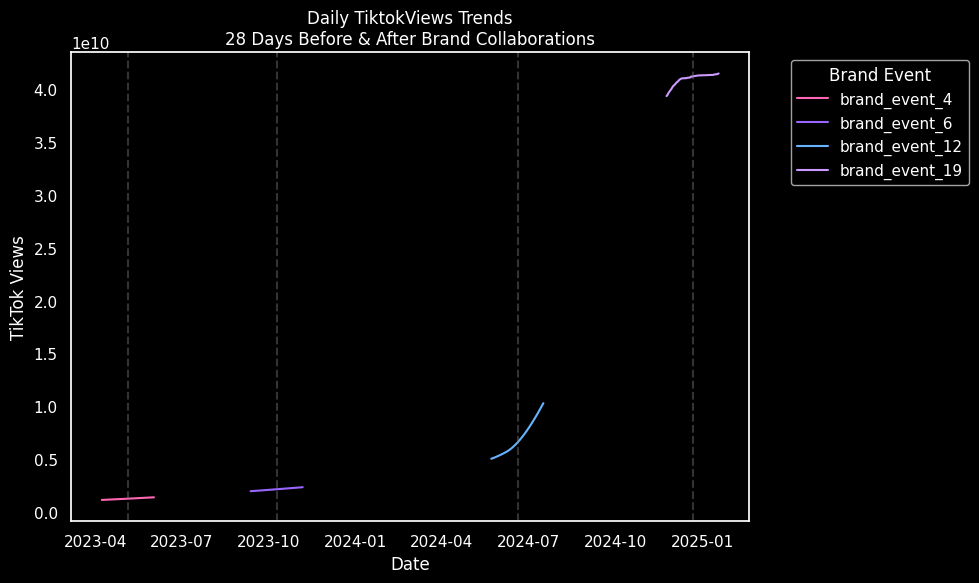

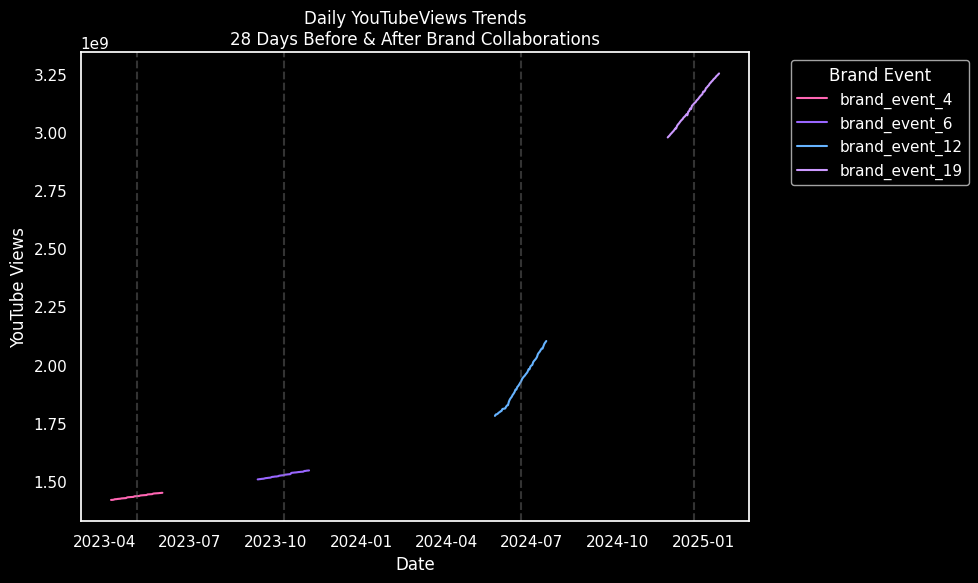

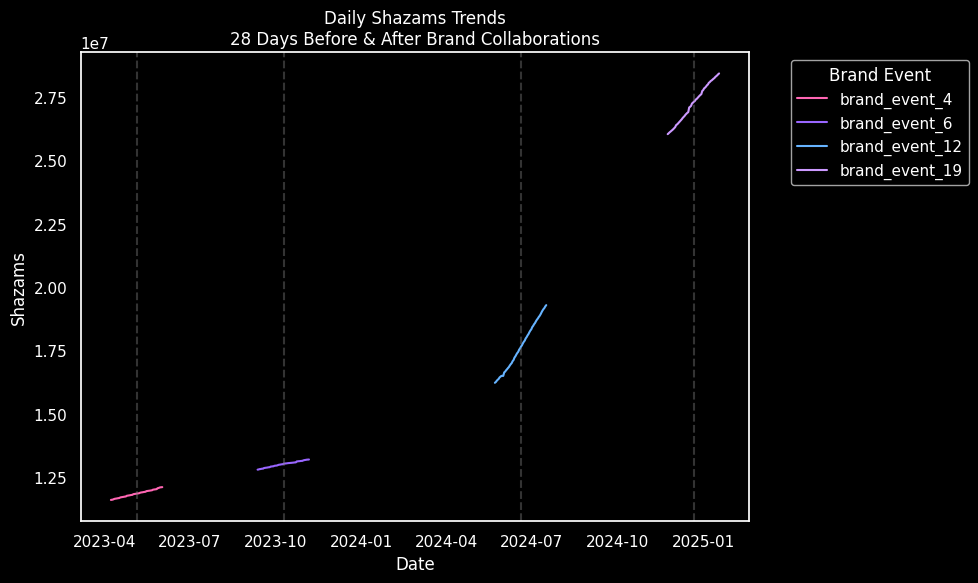

In [ ]:


sns.set(style="white")


# Define custom poppy palette for event_id — extend if more events
event_palette = {
    "brand_event_4" : "#ff66b3",  # Pink
    "brand_event_6": "#9966ff",  # Purple
    "brand_event_12": "#66b3ff",  # Sky blue (extra)
    "brand_event_19": "#cc99ff",  # Light lavender (extra)
    #5: "#ff99cc"   # Light pink (extra)
}

plt.style.use('dark_background')
# Loop through each metric and plot separately
for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df_prepost, x="Date", y=metric, hue="event_id", palette=event_palette)

    # Add vertical lines for brand collab dates
    for event_date in df_prepost["event_date"].unique():
        plt.axvline(event_date, color='gray', linestyle='--', alpha=0.4)

    plt.title(f"Daily {metric} Trends\n28 Days Before & After Brand Collaborations")
    plt.xlabel("Date")
    plt.ylabel(metric.replace("Spotify", "Spotify ").replace("YouTube", "YouTube ").replace("Tiktok", "TikTok "))
    plt.legend(title="Brand Event", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

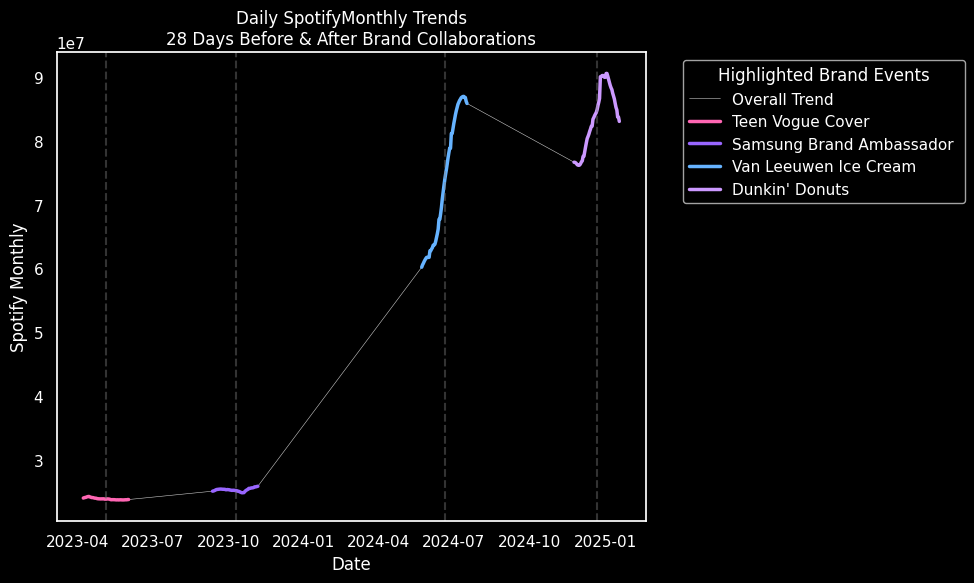

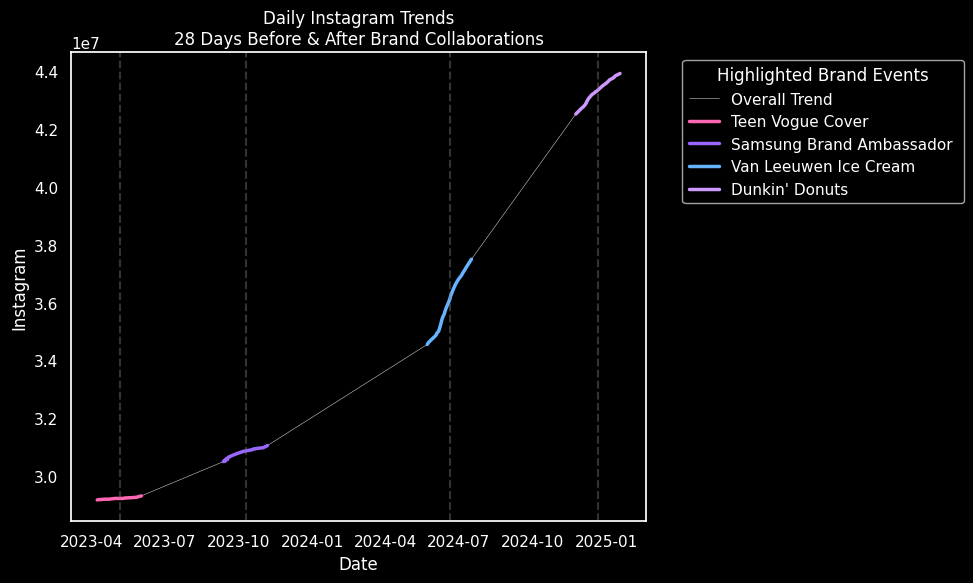

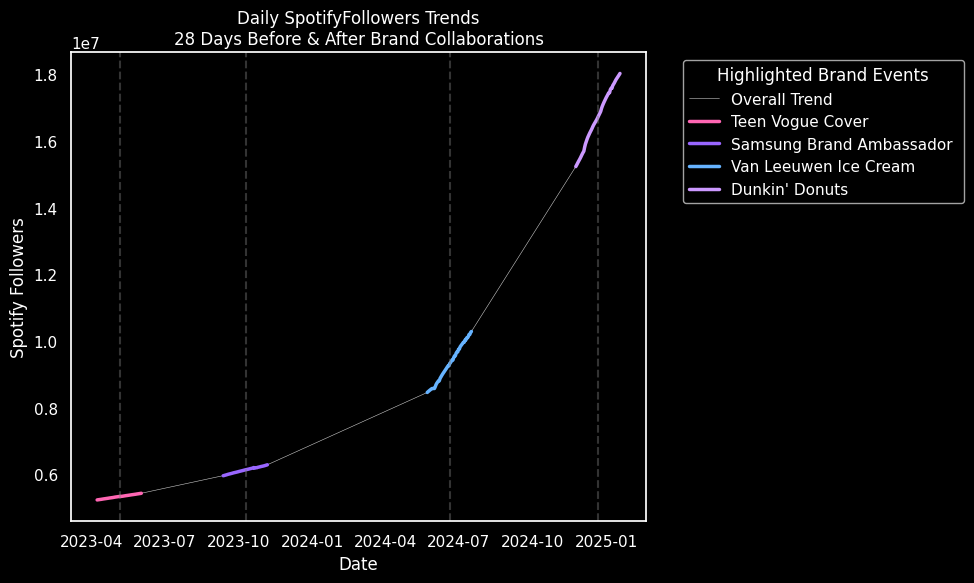

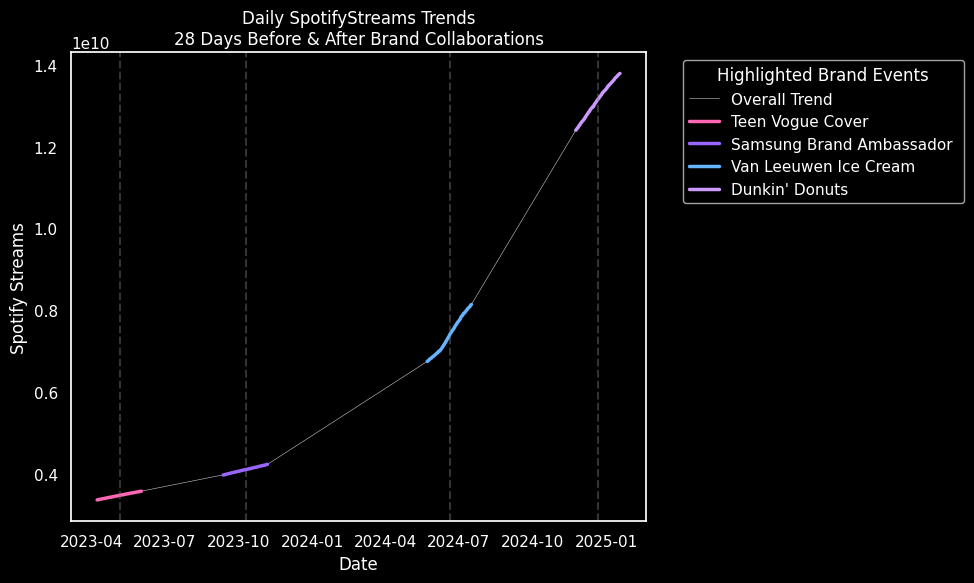

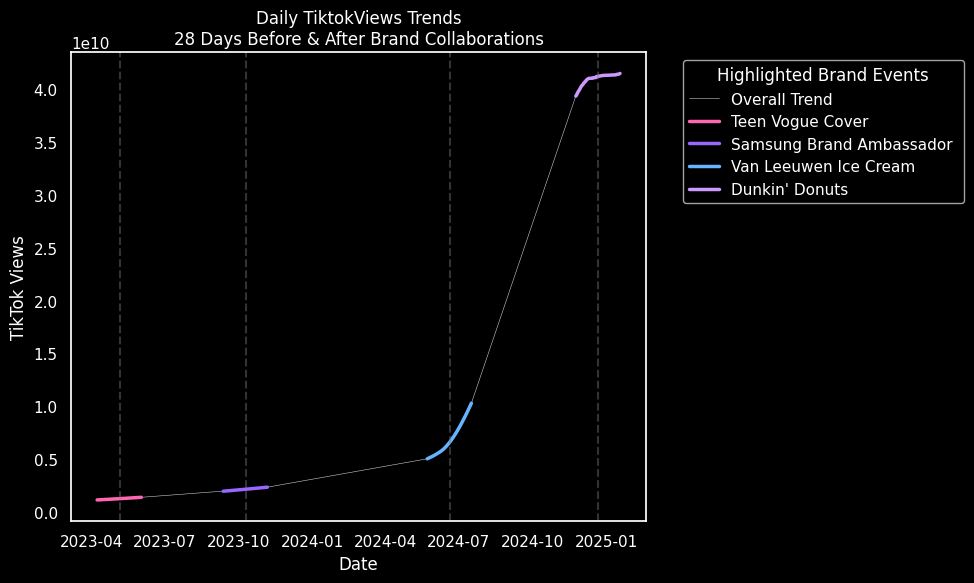

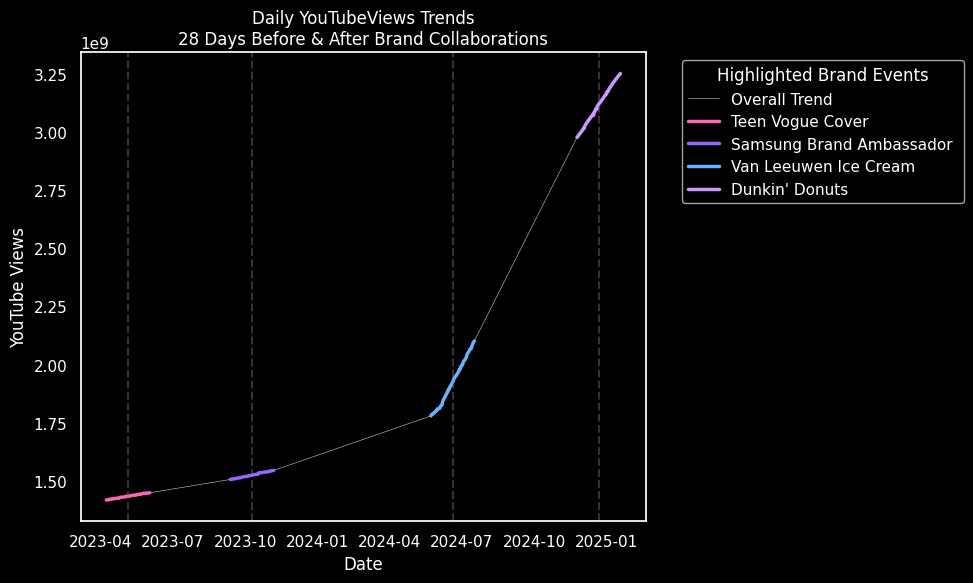

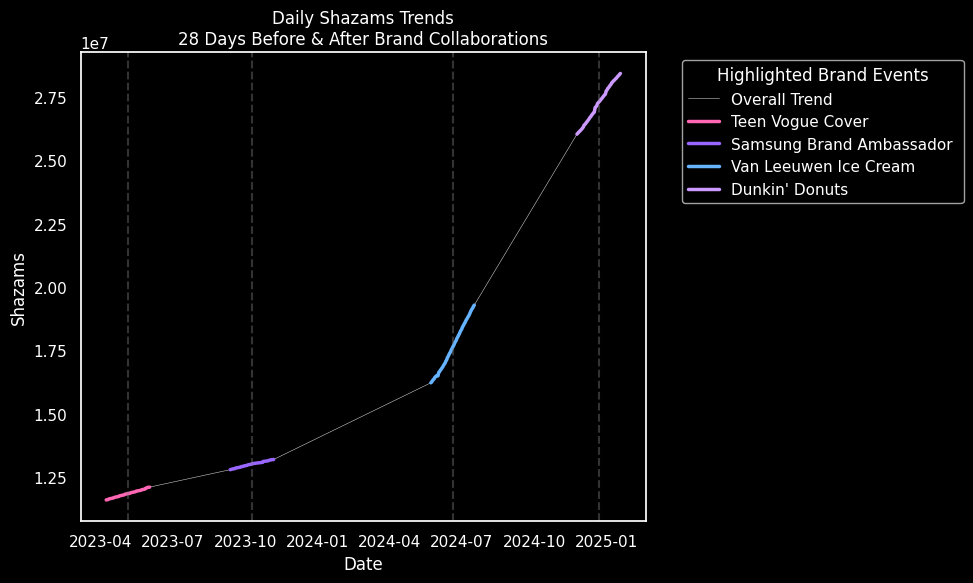

In [ ]:
# Choosing the target metric
metrics = ["SpotifyMonthly", "Instagram", "SpotifyFollowers", "SpotifyStreams", "TiktokViews", "YouTubeViews", "Shazams"]

sns.set(style="white")
plt.style.use('dark_background')

# Mapping of event_id to display names
event_labels = {
    "brand_event_4": "Teen Vogue Cover",
    "brand_event_6": "Samsung Brand Ambassador ",
    "brand_event_12": "Van Leeuwen Ice Cream",
    "brand_event_19": "Dunkin' Donuts"
}

# Custom poppy palette for just the 4 brand events
event_palette = {
    "brand_event_4": "#ff66b3",   # pink
    "brand_event_6": "#9966ff",   # purple
    "brand_event_12": "#66b3ff",  # sky blue
    "brand_event_19": "#cc99ff"   # lavender
}

for metric in metrics:
    plt.figure(figsize=(10, 6))

    # Plot the entire metric trend (all events as one background line)
    sns.lineplot(data=df_prepost, x="Date", y=metric,
                 color='white', linewidth=0.4,alpha=0.8, label='Overall Trend')

    # Plot only the brand events (highlighted segments)
    for event_id, color in event_palette.items():
        subset = df_prepost[df_prepost["event_id"] == event_id]
        label = event_labels.get(event_id, event_id)  # fallback to ID if label not found
        sns.lineplot(data=subset, x="Date", y=metric,
                     label=label, color=color, linewidth=2.5)

    # Vertical lines for each event date
    for event_date in df_prepost["event_date"].unique():
        plt.axvline(event_date, color='gray', linestyle='--', alpha=0.4)

    # Title and axis labels
    plt.title(f"Daily {metric} Trends\n28 Days Before & After Brand Collaborations")
    plt.xlabel("Date")
    plt.ylabel(metric.replace("Spotify", "Spotify ")
                     .replace("YouTube", "YouTube ")
                     .replace("Tiktok", "TikTok "))

    # Clean legend
    plt.legend(title="Highlighted Brand Events", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


# Creating bar chart to visualise average values of each metric pre-post the brand collab

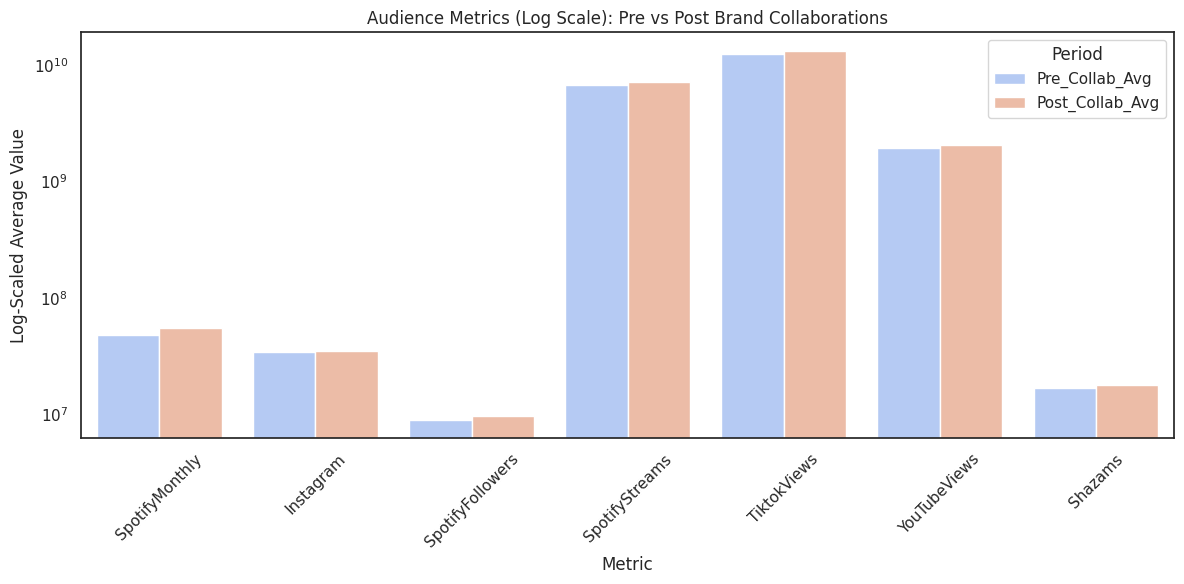

In [ ]:
# Step 1: Compute averages
pre_means = df_prepost[df_prepost["period"] == 0][metrics].mean()
post_means = df_prepost[df_prepost["period"] == 1][metrics].mean()

# Step 2: Combine into a long-format DataFrame
df_pre_post = pd.DataFrame({
    "Metric": metrics,
    "Pre_Collab_Avg": pre_means.values,
    "Post_Collab_Avg": post_means.values
})

# Step 3: Melt for side-by-side plotting
df_melted = df_pre_post.melt(id_vars="Metric",
                             var_name="Period",
                             value_name="Average")

# Step 4: Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x="Metric", y="Average", hue="Period", palette="coolwarm")
plt.yscale("log")
plt.title("Audience Metrics (Log Scale): Pre vs Post Brand Collaborations")
plt.ylabel("Log-Scaled Average Value")
plt.xlabel("Metric")
plt.xticks(rotation=45)
plt.legend(title="Period")
plt.tight_layout()
plt.show()


In [ ]:
df_activity

<ipython-input-82-d29f41de604e>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_pct, x="Metric", y="% Change", palette=custom_colors)
<ipython-input-82-d29f41de604e>:19: UserWarning: 
The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=df_pct, x="Metric", y="% Change", palette=custom_colors)
<ipython-input-82-d29f41de604e>:24: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


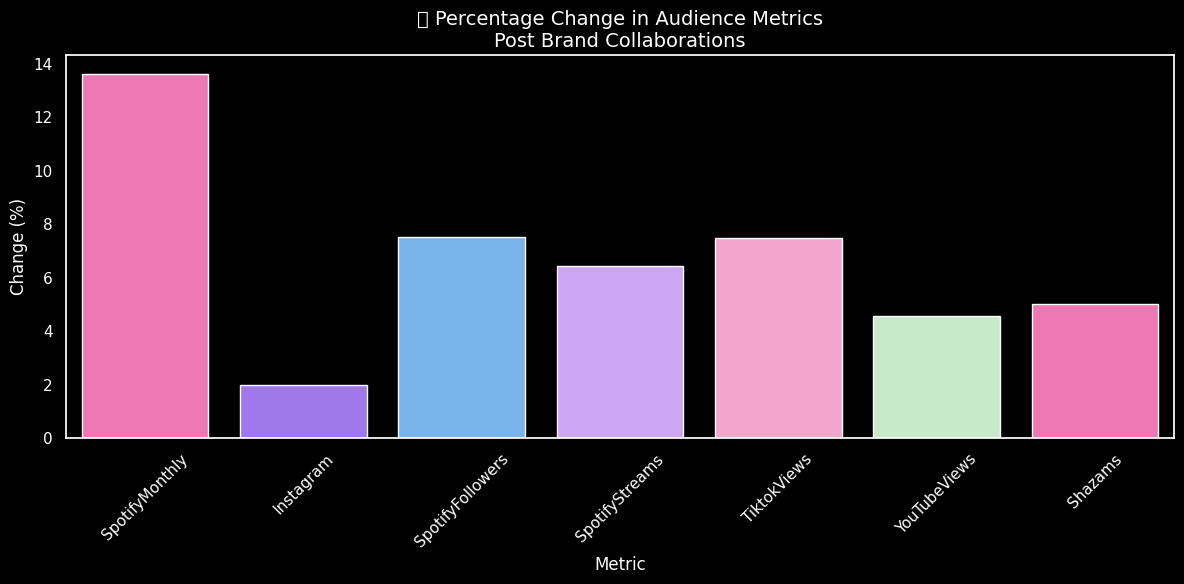

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dark background theme
sns.set(style="white")
plt.style.use("dark_background")

# Calculate percent change
df_pct = df_prepost.groupby("period")[metrics].mean().T
df_pct.columns = ["Pre", "Post"]
df_pct["% Change"] = ((df_pct["Post"] - df_pct["Pre"]) / df_pct["Pre"]) * 100
df_pct = df_pct.reset_index().rename(columns={"index": "Metric"})

custom_colors = ["#ff66b3", "#9966ff", "#66b3ff", "#cc99ff", "#ff99cc", "#c2f0c2"]

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df_pct, x="Metric", y="% Change", palette=custom_colors)
plt.axhline(0, color='gray', linewidth=0.8)
plt.title("✨ Percentage Change in Audience Metrics\nPost Brand Collaborations", fontsize=14)
plt.ylabel("Change (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-19-72ff48ee543a>:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=df_melted, x="Metric", y="Value", hue="Period", ci=95,
<ipython-input-19-72ff48ee543a>:30: FutureWarning: 

The `errcolor` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'color': 'white'}` instead.

  sns.barplot(data=df_melted, x="Metric", y="Value", hue="Period", ci=95,
<ipython-input-19-72ff48ee543a>:30: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 2}` instead.

  sns.barplot(data=df_melted, x="Metric", y="Value", hue="Period", ci=95,


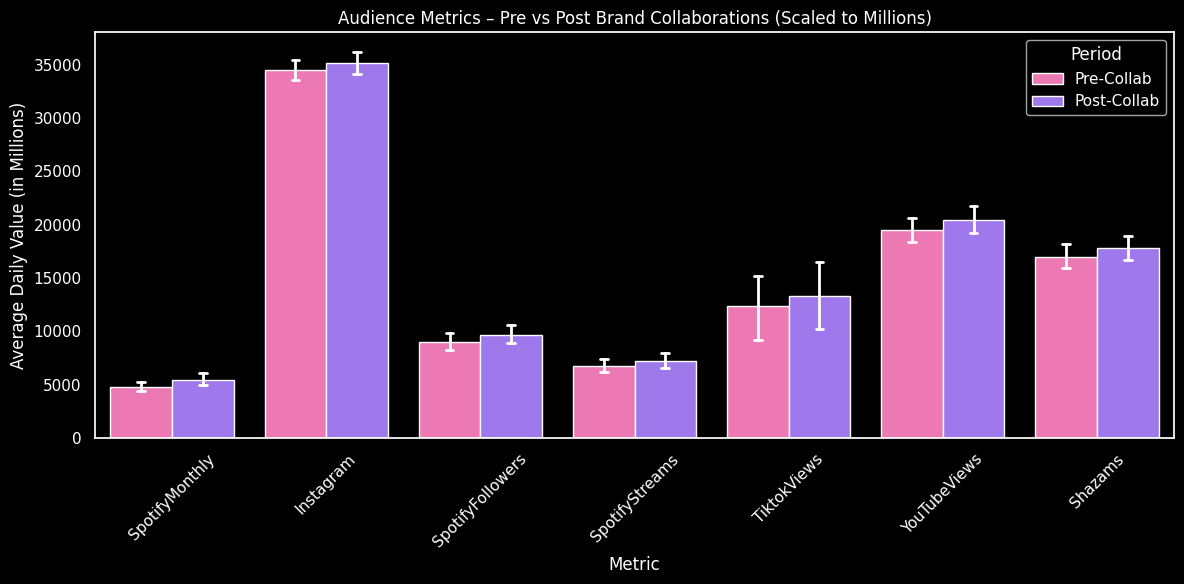

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define uniform scaling (millions)
scaling_factors = {
    "SpotifyMonthly": 1e4,
    "Instagram": 1e3,
    "SpotifyFollowers": 1e3,
    "SpotifyStreams": 1e6,
    "TiktokViews": 1e6,
    "YouTubeViews": 1e5,
    "Shazams": 1e3
}

plt.style.use('dark_background')

# Apply scaling
df_scaled = df_prepost.copy()
for metric, factor in scaling_factors.items():
    df_scaled[metric] = df_scaled[metric] / factor

# Reshape for plotting
df_melted = df_scaled.melt(id_vars="period", value_vars=scaling_factors.keys(),
                           var_name="Metric", value_name="Value")
df_melted["Period"] = df_melted["period"].map({0: "Pre-Collab", 1: "Post-Collab"})

# Plot with new color palette
custom_palette = ["#FF66B3", "#9966FF"]
plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x="Metric", y="Value", hue="Period", ci=95,
            errcolor='white', errwidth=2,capsize=0.1, palette=custom_palette)

# Format
plt.title("Audience Metrics – Pre vs Post Brand Collaborations (Scaled to Millions)")
plt.ylabel("Average Daily Value (in Millions)")
plt.xlabel("Metric")
plt.xticks(rotation=45)
plt.legend(title="Period")
plt.tight_layout()
plt.show()


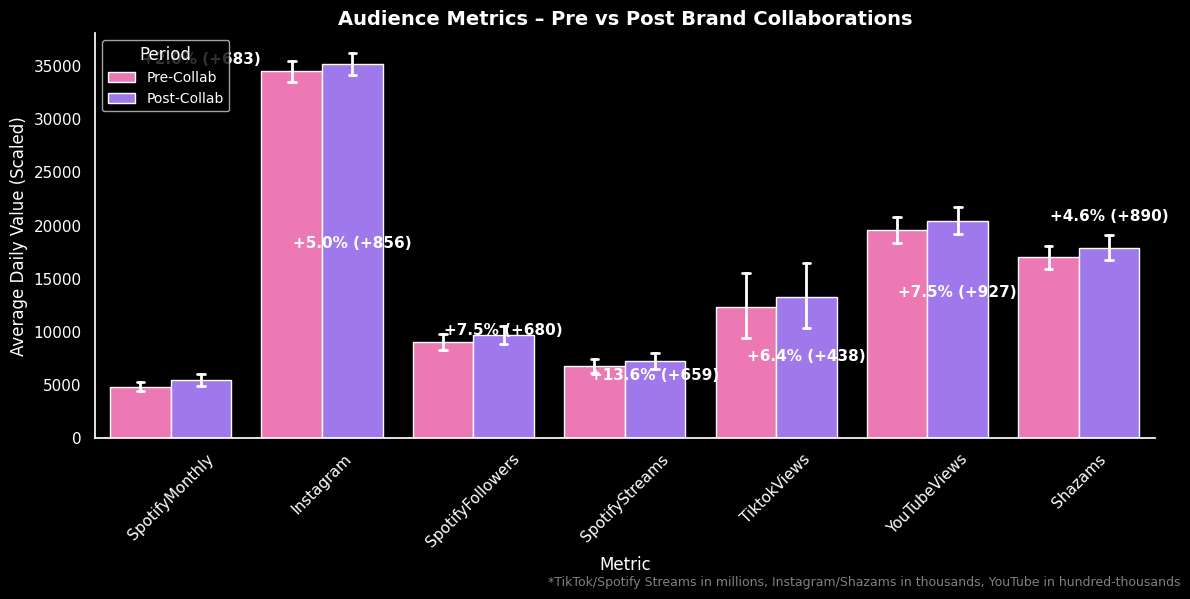

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dark mode setup
plt.style.use('dark_background')
vibrant_palette = ["#ff66b3", "#9966ff"]

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=df_melted,
    x="Metric", y="Value", hue="Period",
    errorbar=('ci', 95),
    palette=vibrant_palette,
    err_kws={'color': 'white', 'linewidth': 2},
    capsize=0.1
)

# Grouped data for labels
grouped = df_melted.groupby(["Metric", "Period"])["Value"].mean().unstack()

# Add bold, clean % + absolute change above post-collab bars
for idx, metric in enumerate(grouped.index):
    pre = grouped.loc[metric, "Pre-Collab"]
    post = grouped.loc[metric, "Post-Collab"]
    pct_change = ((post - pre) / pre) * 100
    abs_change = post - pre

    # Format absolute change
    if abs_change >= 1e6:
        abs_text = f"{abs_change/1e6:.1f}M"
    elif abs_change >= 1e3:
        abs_text = f"{abs_change/1e3:.0f}K"
    else:
        abs_text = f"{abs_change:.0f}"

    label = f"+{pct_change:.1f}% (+{abs_text})"

    # Position above the Post-Collab bar (consistent spacing)
    label_y = post   # move label slightly above the bar
    ax.text(idx + 0.2, label_y, label,
            color='white', fontsize=11, fontweight='bold',
            ha='center')

# Titles and axis formatting
plt.title("Audience Metrics – Pre vs Post Brand Collaborations",
          fontsize=14, weight='bold', color='white')
plt.ylabel("Average Daily Value (Scaled)", fontsize=12, color='white')
plt.xlabel("Metric", fontsize=12, color='white')
plt.xticks(rotation=45, color='white')
plt.yticks(color='white')
plt.legend(title="Period", loc="upper left", fontsize=10)

# Caption
plt.figtext(0.99, 0.01,
    "*TikTok/Spotify Streams in millions, Instagram/Shazams in thousands, YouTube in hundred-thousands",
    horizontalalignment='right', fontsize=9, color='gray'
)

sns.despine()
plt.tight_layout()
plt.show()


In [ ]:
from scipy.stats import ttest_ind
import pandas as pd

# Create a list to store test results
ttest_results = []

for metric in scaling_factors.keys():
    pre_values = df_scaled[df_scaled["period"] == 0][metric]
    post_values = df_scaled[df_scaled["period"] == 1][metric]

    # Perform independent two-sample t-test
    t_stat, p_val = ttest_ind(post_values, pre_values, equal_var=False)

    ttest_results.append({
        "Metric": metric,
        "Pre_Mean": round(pre_values.mean(), 2),
        "Post_Mean": round(post_values.mean(), 2),
        "t-statistic": round(t_stat, 3),
        "p-value": round(p_val, 4),
        "Significant (p<0.05)": "Yes" if p_val < 0.05 else "No"
    })

# Create DataFrame from results
df_ttest_summary = pd.DataFrame(ttest_results)

# Display it
display(df_ttest_summary)


,Metric,Pre_Mean,Post_Mean,t-statistic,p-value,Significant (p<0.05)
0,SpotifyMonthly,4829.19,5487.79,1.778,0.0768,No
1,Instagram,34505.22,35187.92,0.925,0.3560,No
2,SpotifyFollowers,9025.36,9705.61,1.124,0.2621,No
3,SpotifyStreams,6805.27,7243.53,0.852,0.3953,No
4,TiktokViews,12370.24,13297.53,0.421,0.6742,No
5,YouTubeViews,19554.71,20444.68,0.985,0.3256,No
6,Shazams,17001.66,17857.41,1.049,0.2955,No


from matplotlib import pyplot as plt
df_ttest_summary['Pre_Mean'].plot(kind='hist', bins=20, title='Pre_Mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_ttest_summary['Post_Mean'].plot(kind='hist', bins=20, title='Post_Mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_ttest_summary['t-statistic'].plot(kind='hist', bins=20, title='t-statistic')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_ttest_summary['p-value'].plot(kind='hist', bins=20, title='p-value')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df_ttest_summary.groupby('Metric').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_ttest_summary.plot(kind='scatter', x='Pre_Mean', y='Post_Mean', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_ttest_summary.plot(kind='scatter', x='Post_Mean', y='t-statistic', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_ttest_summary.plot(kind='scatter', x='t-statistic', y='p-value', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_ttest_summary['Pre_Mean'].plot(kind='line', figsize=(8, 4), title='Pre_Mean')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_ttest_summary['Post_Mean'].plot(kind='line', figsize=(8, 4), title='Post_Mean')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_ttest_summary['t-statistic'].plot(kind='line', figsize=(8, 4), title='t-statistic')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_ttest_summary['p-value'].plot(kind='line', figsize=(8, 4), title='p-value')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_ttest_summary['Metric'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_ttest_summary, x='Pre_Mean', y='Metric', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_ttest_summary['Metric'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_ttest_summary, x='Post_Mean', y='Metric', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_ttest_summary['Metric'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_ttest_summary, x='t-statistic', y='Metric', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_ttest_summary['Metric'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_ttest_summary, x='p-value', y='Metric', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-4-ddc0d7b1e058>:41: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


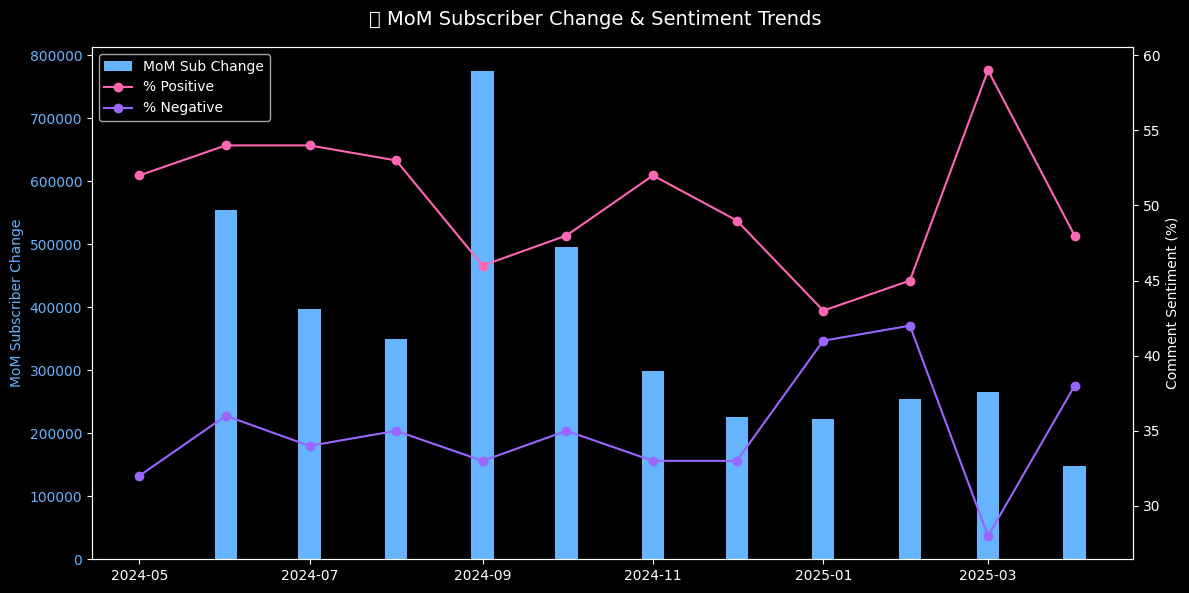

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Manually create the data (replace with your actual loading method if needed)
data = {
    "Month Year": ["May'24", "Jun'24", "Jul'24", "Aug'24", "Sep'24", "Oct'24", "Nov'24", "Dec'24",
                   "Jan'25", "Feb'25", "Mar'25", "Apr'25"],
    "Youtube Subs": [9373552, 9928004, 10325489, 10675812, 11450005, 11946135, 12244302, 12469362,
                     12691943, 12946437, 13212298, 13360008],
    "% Positive": [52, 54, 54, 53, 46, 48, 52, 49, 43, 45, 59, 48],
    "% Negative": [32, 36, 34, 35, 33, 35, 33, 33, 41, 42, 28, 38]
}
df = pd.DataFrame(data)
df["Date"] = pd.to_datetime(df["Month Year"], format="%b'%y")

# Calculate MoM Change
df["MoM Change"] = df["Youtube Subs"].diff()

# Plotting
plt.style.use("dark_background")
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for MoM subscriber change
ax1.bar(df["Date"], df["MoM Change"], color="#66b3ff", label="MoM Sub Change", width = 8)
ax1.set_ylabel("MoM Subscriber Change", color="#66b3ff")
ax1.tick_params(axis='y', labelcolor="#66b3ff")

# Second y-axis for sentiment
ax2 = ax1.twinx()
ax2.plot(df["Date"], df["% Positive"], color="#ff66b3", marker='o', label="% Positive")
ax2.plot(df["Date"], df["% Negative"], color="#9966ff", marker='o', label="% Negative")
ax2.set_ylabel("Comment Sentiment (%)")

# Final touches
fig.suptitle("📉 MoM Subscriber Change & Sentiment Trends", fontsize=14)
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc="upper left")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
